In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df=pd.read_csv("tr-covid19.csv")
df.head()

,Unnamed: 0,Date,Total number of test,Total number of causes,Total number of deaths,Number of critically ill patients,Total Number of recoveries,number of cases,number of sick,number of test,number of deaths,Number of recoveries
0,0,3.07.2021,61455218.0,5440368,49874.0,702.0,5310769.0,4537.0,478.0,218924.0,45.0,4913.0
1,1,2.07.2021,61236294.0,5435831,49829.0,697.0,5305856.0,4891.0,461.0,223782.0,55.0,5352.0
2,2,1.07.2021,61012512.0,5430940,49774.0,706.0,5300504.0,5288.0,462.0,225537.0,42.0,6219.0
3,3,30.06.2021,60786975.0,5425652,49732.0,727.0,5294285.0,5496.0,522.0,228163.0,45.0,7191.0
4,4,29.06.2021,60558812.0,5420156,49687.0,730.0,5287094.0,5846.0,510.0,229846.0,53.0,6536.0


In [27]:
for i in df.columns:
    if df[i].isnull().sum()!=0:
        mean=df[str(i)].mean()
        df[str(i)].replace(np.nan,mean, inplace=True)
    

In [82]:
X = np.asarray(df[[ 'Total number of test', 'Total number of causes',
       'Total number of deaths', 'Number of critically ill patients',
       'Total Number of recoveries','number of sick',
       'number of test', 'number of deaths', 'Number of recoveries']])
X[0:5]

array([[6.1455218e+07, 5.4403680e+06, 4.9874000e+04, 7.0200000e+02,
        5.3107690e+06, 4.7800000e+02, 2.1892400e+05, 4.5000000e+01,
        4.9130000e+03],
       [6.1236294e+07, 5.4358310e+06, 4.9829000e+04, 6.9700000e+02,
        5.3058560e+06, 4.6100000e+02, 2.2378200e+05, 5.5000000e+01,
        5.3520000e+03],
       [6.1012512e+07, 5.4309400e+06, 4.9774000e+04, 7.0600000e+02,
        5.3005040e+06, 4.6200000e+02, 2.2553700e+05, 4.2000000e+01,
        6.2190000e+03],
       [6.0786975e+07, 5.4256520e+06, 4.9732000e+04, 7.2700000e+02,
        5.2942850e+06, 5.2200000e+02, 2.2816300e+05, 4.5000000e+01,
        7.1910000e+03],
       [6.0558812e+07, 5.4201560e+06, 4.9687000e+04, 7.3000000e+02,
        5.2870940e+06, 5.1000000e+02, 2.2984600e+05, 5.3000000e+01,
        6.5360000e+03]])

In [37]:
y = np.asarray(df['number of cases'])
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)


array([ 0,  2,  8, 12, 20], dtype=int64)

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [39]:
df.describe()

,index,Unnamed: 0,Total number of test,Total number of causes,Total number of deaths,Number of critically ill patients,Total Number of recoveries,number of cases,number of sick,number of test,number of deaths,Number of recoveries
count,480.000000,480.000000,4.800000e+02,4.800000e+02,480.000000,480.000000,4.800000e+02,480.000000,480.000000,480.000000,480.000000,480.000000
mean,239.500000,239.500000,2.126194e+07,1.673412e+06,18038.748945,2183.358824,1.609156e+06,18944.122172,1836.894397,128578.170739,107.381466,9225.921053
std,138.708327,138.708327,1.821382e+07,1.862620e+06,15259.561534,1187.517333,1.754716e+06,10410.098844,1402.617374,79768.602927,85.951235,13160.746135
min,0.000000,0.000000,4.782300e+04,1.000000e+00,1.000000,542.000000,4.200000e+01,4537.000000,390.000000,7533.000000,14.000000,256.000000
25%,119.750000,119.750000,4.521844e+06,2.097060e+05,5414.750000,1366.750000,2.082012e+05,13740.000000,920.750000,46372.750000,48.000000,1313.750000
50%,239.500000,239.500000,1.716786e+07,3.880380e+05,11189.000000,2183.358824,3.727310e+05,18944.122172,1458.000000,123324.000000,77.000000,4535.000000
75%,359.250000,359.250000,3.388961e+07,2.760402e+06,28917.000000,2240.250000,2.610671e+06,18944.122172,2265.250000,190675.750000,153.000000,9225.921053
max,479.000000,479.000000,6.145522e+07,5.440368e+06,49874.000000,5988.000000,5.310769e+06,63082.000000,7381.000000,322128.000000,394.000000,81302.000000


In [32]:
bar_data = df.groupby(['number of cases'])['Date'].sum().reset_index()
fig = px.bar(bar_data, x="Date", y="number of cases", title='Total number of cases') 
fig.show()

## Relationship between fetaures

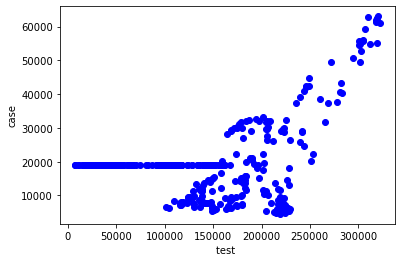

In [63]:
plt.scatter(df['number of test'], df['number of cases'],  color='blue')
plt.xlabel("test ")
plt.ylabel("case")
plt.show()

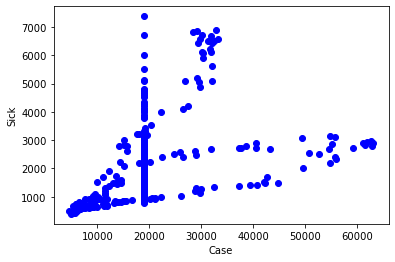

In [93]:
plt.scatter(df['number of cases'], df['number of sick'],  color='blue')
plt.xlabel("Case")
plt.ylabel("Sick")
plt.show()

In [92]:
fig = go.Figure(data=go.Scatter(x=df['number of cases'], y=df['number of sick'], mode='markers', marker=dict(color='red'))) 
fig.show()

## Regression

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 9) (384,)
Test set: (96, 9) (96,)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\akyol\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LogisticRegression(C=0.01, solver='liblinear')

In [89]:
yhatlr = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import jaccard_score
from sklearn.metrics import r2_score
print("Residual sum of squares (MSE): %.2f" % np.mean((yhatlr - y_test) ** 2))
print("R2-score: %.2f" % r2_score(yhatlr , y_test) )

Residual sum of squares (MSE): 115.57
R2-score: 0.95


In [95]:
from sklearn.linear_model import LinearRegression

#X=df['number of test']
lr = LinearRegression()
lr.fit(X_train, y_train)
test_y_lr = lm.predict(X_test)
print('Variance score: %.2f' % lr.score(X_train, y_train))
print ('Coefficients: ', lr.coef_)
print("R2-score: %.2f" % r2_score(y_test , test_y_lr) )

Variance score: 0.75
Coefficients:  [-1.39508916e-06 -2.31934037e-05 -3.07847451e-04 -4.05187173e-03
  8.58582967e-06  6.38493014e-03  3.42960793e-04 -7.86993128e-02
  2.70219399e-03]
R2-score: 0.68


### Polynomial Regression with degree 2

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)

In [86]:
clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 4.11664223e-01  8.89636074e-07  5.24719832e-04 -2.25402831e-02
 -2.69424943e-02 -5.32929302e-04 -2.17900697e-02  1.62364978e-03
 -5.92837604e-01  1.99571479e-03 -1.31498740e-12  2.46358489e-12
  2.96891295e-09 -5.82175723e-09 -1.33052562e-11 -5.35308559e-09
  3.42320478e-10 -7.05098725e-09  2.21032595e-10  1.09697140e-10
  2.53736119e-08 -3.52499839e-08 -6.69714728e-10 -1.66768427e-07
  9.59386653e-10 -1.97176772e-08  8.80246510e-09  3.48981987e-07
  4.91365532e-06 -3.49575630e-08  1.05663736e-05 -4.92010744e-07
 -1.34129475e-04  3.13987950e-07  4.21013763e-06  6.18064357e-08
  1.44847901e-06  1.77966601e-07  3.16276410e-05 -1.23075060e-06
  5.97953388e-10  1.22122300e-07  4.98531882e-10  1.55302715e-06
 -1.33030003e-08 -3.52815195e-06  3.43714219e-08  3.35742387e-04
 -2.18248438e-07 -8.41058034e-09  2.94461970e-06 -2.98993291e-08
 -3.93985312e-03  1.54168975e-05 -1.47602846e-08]
Intercept:  211.13520565557366


In [87]:
test_x_poly = poly.fit_transform(X_test)
y_testhat = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_testhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_testhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_testhat ) )

Mean absolute error: 7.80
Residual sum of squares (MSE): 135.71
R2-score: 0.94
